# **Hierarchical Clustering**

Hierarchical clustering is a connectivity-based clustering model that groups the data points together that are close to each other based on the measure of similarity or distance. The assumption is that data points that are close to each other are more similar or related than data points that are farther apart.

A dendrogram (tree-like figure) depicts hierarchical relationships, with individual data points at the bottom and largest clusters at the top.

Dendrograms are created by iteratively merging or splitting clusters until all points are in one cluster or a set number of clusters is reached.

The ideal number of clusters is determined by slicing the dendrogram at the height where branches form distinct clusters.


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20230425190545/download-(10).png">


## Types of Hierarchical Clustering

1. Hierarchical Agglomerative Clustering (HAC) or bottom-up approach: A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerate pairs of clusters until all clusters have been merged into a single cluster that contains all data. 

2. Hierarchical Divisive clustering or top-down approach: This algorithm also does not require to prespecify the number of clusters. It requires a method for splitting a cluster that contains the whole data and proceeds by splitting clusters recursively until individual data have been split into singleton clusters.





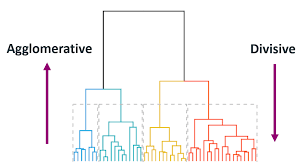

### **Importing All Necessary Libraries**

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

### **Data Framing**

In [20]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
print(f"data shape: {data.shape}\n") # Checking data shape
print(data.isnull().sum(), "\n") # Checking null values
print(data.describe())

data shape: (200, 5)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64 

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


### **Encoding the 'Gender' column**

In [22]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Male = 1, Female = 0 

### **Selecting relevant columns for clustering including the encoded 'Gender' column**

In [23]:
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

### **Standardize the features**

In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

StandardScaler is used to standardize the features. This step ensures that each feature has a mean of 0 and a standard deviation of 1, which is important for clustering algorithms.

### **Applying hierarchical clustering**

In [25]:
linked = linkage(scaled_features, method='ward')

method='ward': Specifies that Ward's method should be used for clustering.

Ward's Method: Ward's method is a popular agglomerative hierarchical clustering method. It minimizes the total within-cluster variance. At each step, it merges the pair of clusters that leads to the minimum increase in total within-cluster variance.

### **Plotting the dendrogram'**

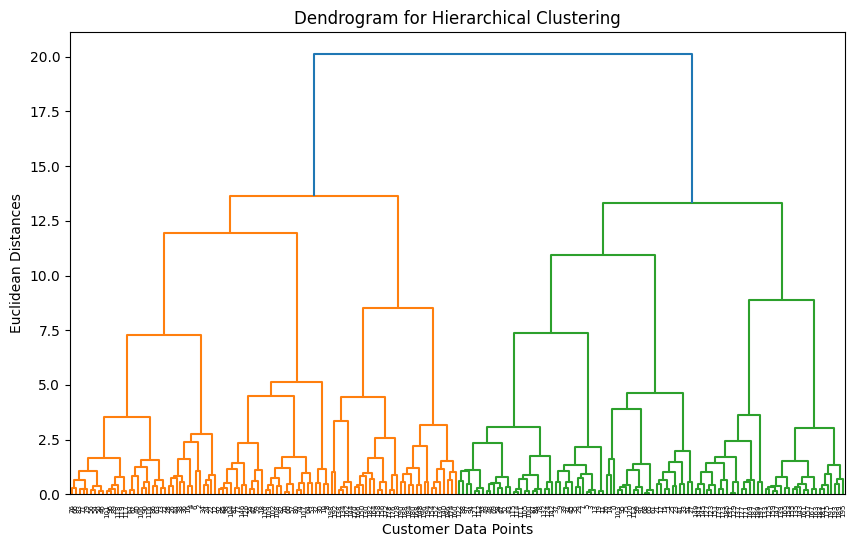

In [26]:
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

Key Elements of the Dendrogram

1. Y-Axis: Represents the distances between clusters. Height indicates the distance (dissimilarity) between merged clusters.

2. X-Axis: Represents individual data points (customers). Each leaf (bottom point) corresponds to a single data point.

3. Branches (Linkages): Show how clusters are merged.
Vertical position of the merge indicates the distance between clusters.
Length of the branch represents the similarity between clusters (shorter branches indicate more similarity).

4. Color-Coded Clusters: Different colors (green and orange) differentiate major clusters.
Colors visually separate clusters at a chosen threshold level.
Interpreting the Dendrogram

5. Threshold Line: Draw a horizontal line at a specific height to decide the number of clusters.
Branches below this line are considered separate clusters.
A reasonable threshold might be around 15 units on the y-axis, indicating two major clusters.

6. Cluster Similarity: The dendrogram shows the dataset can be divided into two major clusters at the top level.
These major clusters can be further subdivided into smaller clusters, showing the hierarchical nature of clustering.
Choosing the Number of Clusters

7. Threshold at 15 Units: Divides the data points into two main clusters.

8. Lower Threshold: Capture more detailed groupings and increase the number of clusters.

In [27]:
from scipy.cluster.hierarchy import fcluster

# Choose a threshold to cut the dendrogram
threshold = 15  # This can be adjusted based on the dendrogram

# Extract clusters
clusters = fcluster(linked, threshold, criterion='distance')

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Analyze the clusters by computing the mean of each feature for each cluster
cluster_analysis = data.groupby('Cluster').mean()

# Display the cluster analysis
print(cluster_analysis)

         CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                      
1            101.25    0.41  28.7               60.45                    68.0
2             99.75    0.47  49.0               60.67                    32.4


Explanation

CustomerID: The average CustomerID for each cluster. Since CustomerID is not a meaningful feature for clustering (it is just an identifier), its average value doesn't provide useful insights.

Gender: The average value of the Gender column, which was encoded as 0 for female and 1 for male. A value of 0.41 in Cluster 1 indicates that there are more females than males in this cluster, while a value of 0.47 in Cluster 2 indicates a roughly equal distribution with a slight male predominance.

Age: The average age of customers in each cluster. Cluster 1 has a younger average age of 28.7, while Cluster 2 has an older average age of 49.0.

Annual Income (k$): The average annual income in thousands of dollars. Both clusters have a similar average annual income of around 60.45k$ to 60.67k$.

Spending Score (1-100): The average spending score. Cluster 1 has a higher average spending score of 68.0, indicating higher spending behavior, while Cluster 2 has a lower average spending score of 32.4, indicating lower spending behavior.

Interpretation

Cluster 1:
Predominantly younger customers (average age: 28.7).
Slightly more females than males (Gender: 0.41).
Average annual income of around 60.45k$.
Higher spending score (68.0), indicating high spending behavior.

Cluster 2:
Older customers (average age: 49.0).
Roughly equal distribution of males and females with a slight male predominance (Gender: 0.47).
Average annual income of around 60.67k$.
Lower spending score (32.4), indicating lower spending behavior.


This analysis helps in understanding the demographic and spending characteristics of each cluster. Cluster 1 consists of younger, higher-spending individuals, while Cluster 2 consists of older, lower-spending individuals. This information can be useful for targeted marketing strategies, customer segmentation, and personalized services.